In [1]:
import funcs_for_results_tables as get_results
import pandas as pd
import glob
import funcs_plot_intrinsic_props as pl_intr
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import datetime
from scipy.stats import wilcoxon

dest_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/results/human/plots/FENS_poster/'
human_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/'
exp_view = pd.read_excel(glob.glob(human_dir + '*experiments_overview.xlsx')[0]) 
#collect all QC intrinsic datatables

df_intr_props = get_results.collect_intrinsic_df()
df_intr_props = pl_intr.get_column_RMPs_from_char(df_intr_props)
df_intr_props = pl_intr.change_to_numeric(df_intr_props)

/Users/verjim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/detect_peaks.py:11: UserWarning: A newest version is available at https://pypi.org/project/detecta/
  warnings.warn('A newest version is available at https://pypi.org/project/detecta/')


In [2]:
titles_dict_all = pl_intr.dict_for_plotting()

In [3]:
#cleaning params
min_RMP = -100
max_RMP = -45

min_age = 10
max_age = 150

min_tau = 0

max_Rs = 40

In [4]:
#clean data

# RMP values
df_intr_props_clean = df_intr_props[(df_intr_props.resting_potential > min_RMP) & 
                                    (df_intr_props.resting_potential < max_RMP)]
df_intr_props_clean = df_intr_props_clean[(df_intr_props.RMP_from_char > min_RMP) & 
                                    (df_intr_props.RMP_from_char < max_RMP)]

# age
df_intr_props_clean = df_intr_props_clean[(df_intr_props_clean.patient_age > min_age) &
                                          (df_intr_props_clean.patient_age < max_age)]

#tau
df_intr_props_clean = df_intr_props_clean[(df_intr_props_clean.membra_time_constant_tau > min_tau)]

# access resistance
df_intr_props_clean = df_intr_props_clean[(df_intr_props_clean.Rs < max_Rs)]

/var/folders/5y/f01m99kn5tx3chk04wp6sc440000gn/T/ipykernel_27471/2803624614.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_intr_props_clean = df_intr_props_clean[(df_intr_props.RMP_from_char > min_RMP) &


In [9]:
df_intr_props_clean.hrs_incubation.describe()

count    808.000000
mean       8.582116
std       10.542185
min        0.000000
25%        0.000000
50%        0.000000
75%       21.000000
max       25.000000
Name: hrs_incubation, dtype: float64

In [16]:
df_intr_props_hrs_inc = pl_intr.filter_adult_hrs_incubation_data(df_intr_props_clean, min_age = 10, hrs_inc = 16, max_age = 151) 

In [17]:
len(df_intr_props_hrs_inc)

777

# Parameters distributions

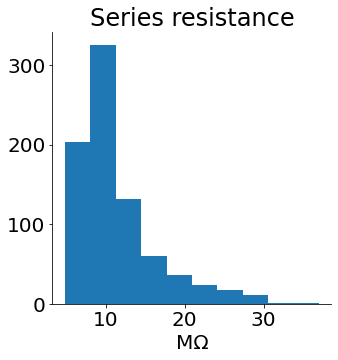

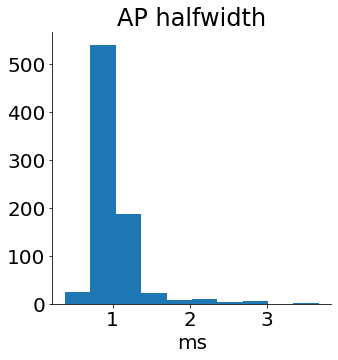

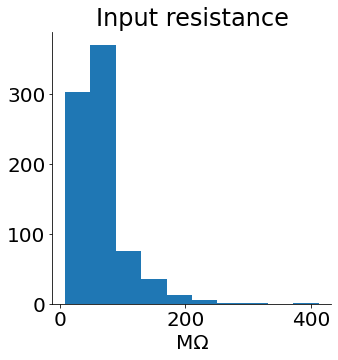

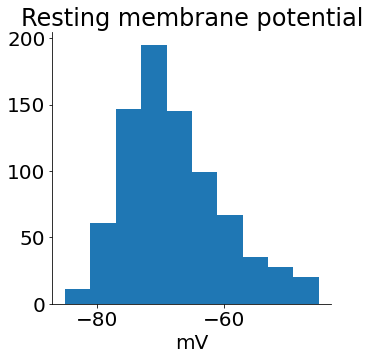

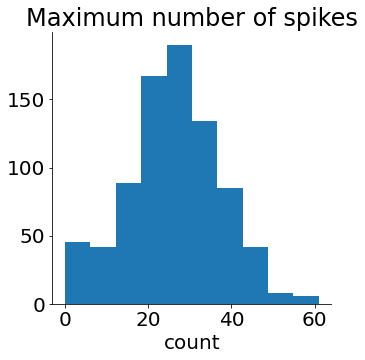

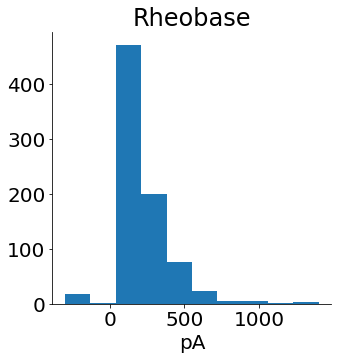

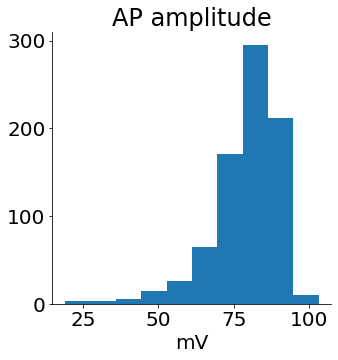

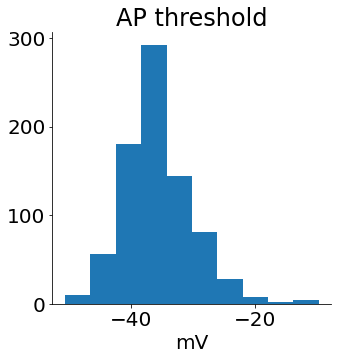

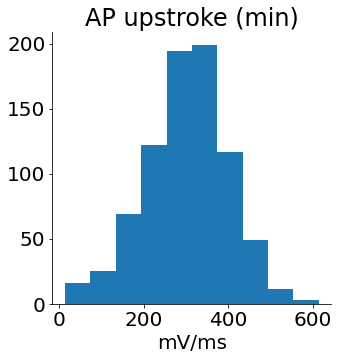

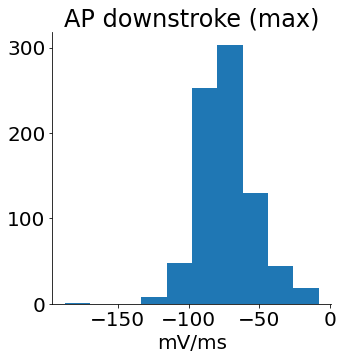

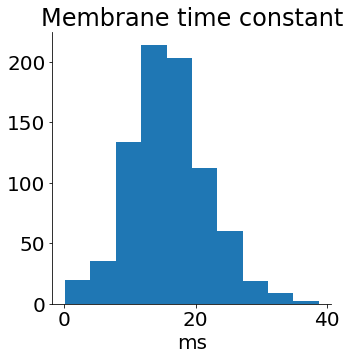

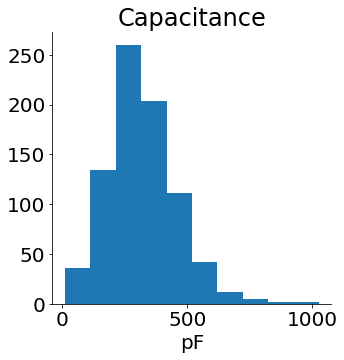

In [6]:
for param in titles_dict_all.keys():
    fig,ax  = plt.subplots(1,1, figsize = (5,5))
    ax.hist(df_intr_props_clean[param])
    ax.set_title(titles_dict_all[param][0])
    ax.set_xlabel(titles_dict_all[param][1])
    plt.show()


# Correlations Params with Age

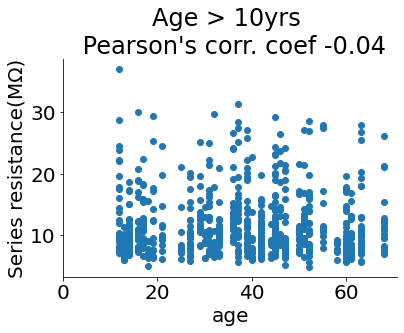

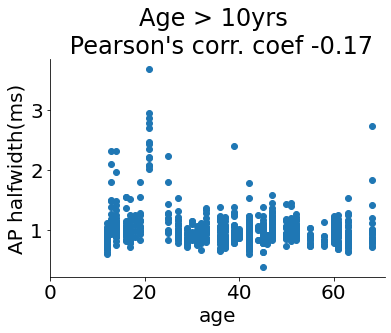

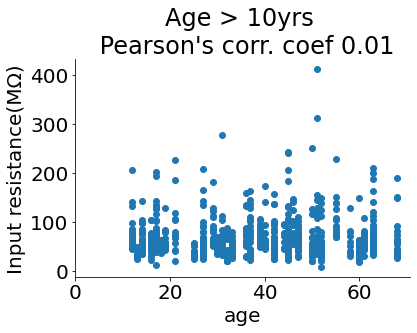

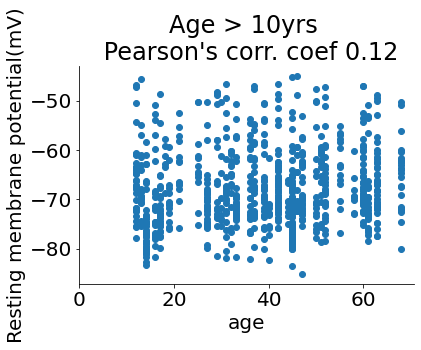

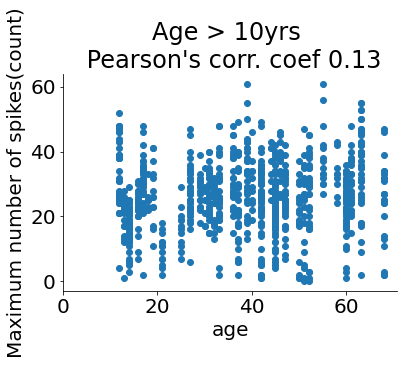

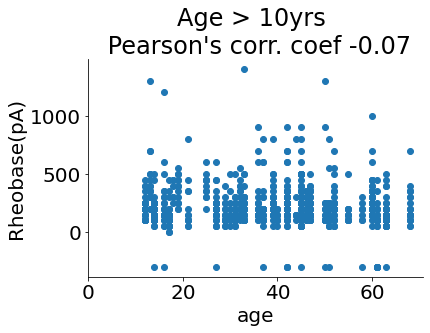

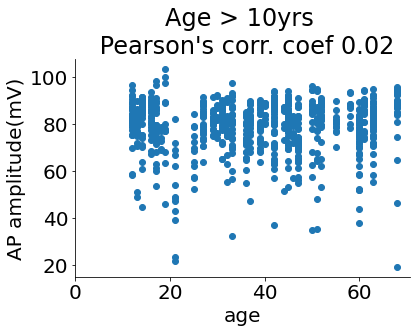

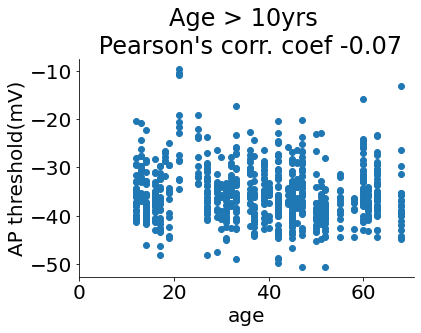

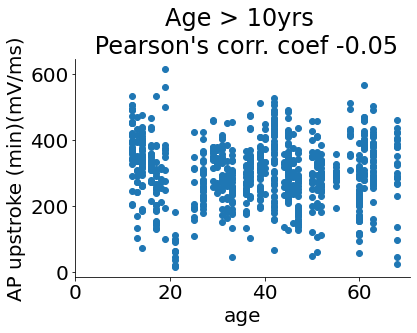

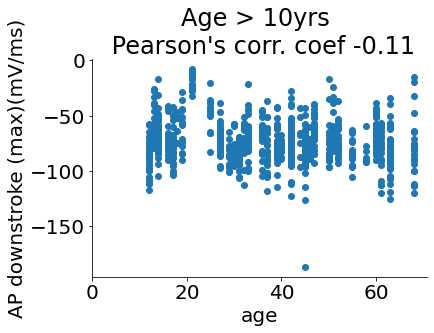

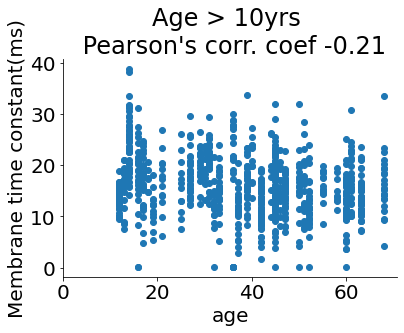

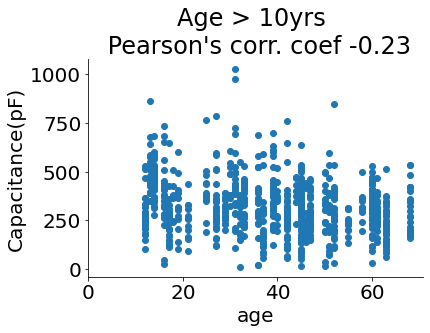

In [7]:
#     date = str(datetime.date.today())
for param in titles_dict_all.keys():
    if df_intr_props_clean[param].isnull().values.any():
        corr = df_intr_props_clean.patient_age.corr(df_intr_props_clean[param])
    else:
        corr = np.corrcoef(df_intr_props_clean.patient_age, df_intr_props_clean[param])[1,0]

    plt.scatter(df_intr_props_clean.patient_age, df_intr_props_clean[param])
    plt.xlabel('age')
    plt.xticks([0,20,40,60])
    plt.ylabel(titles_dict_all[param][0] + '(' +titles_dict_all[param][1] + ')')
    plt.title("Age > " + str(min_age) + "yrs \n Pearson's corr. coef " + str(round(corr, 2)))
    plt.show()


#     plt.savefig('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/results/human/plots/age_dependencies/' + date
#                 + '_' +param + '_age.png')

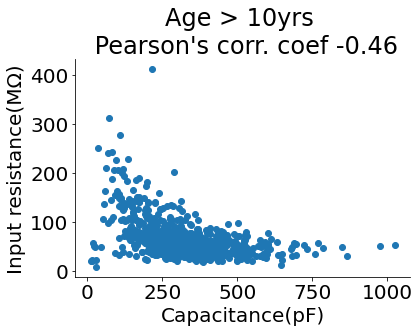

In [8]:
param1 = 'capacitance'
param2 = 'Rin'

corr = df_intr_props_clean[param1].corr(df_intr_props_clean[param2])

plt.scatter(df_intr_props_clean[param1], df_intr_props_clean[param2])
plt.xlabel('age')
# plt.xticks([0,20,40,60])
plt.xlabel(titles_dict_all[param1][0] + '(' +titles_dict_all[param1][1] + ')')
plt.ylabel(titles_dict_all[param2][0] + '(' +titles_dict_all[param2][1] + ')')
plt.title("Age > " + str(min_age) + "yrs \n Pearson's corr. coef " + str(round(corr, 2)))
plt.show()


In [9]:
df_intr_props_clean.columns

Index(['area', 'Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'tissue_source',
       'OP', 'patcher', 'patient_age', 'filename', 'slice', 'cell_ch',
       'cell_ID', 'day', 'treatment', 'hrs_incubation', 'repatch',
       'hrs_after_OP', 'Rs', 'Rin', 'resting_potential', 'max_spikes',
       'Rheobase', 'AP_heigth', 'TH', 'max_depol', 'max_repol',
       'membra_time_constant_tau', 'capacitance', 'comments', 'rheo_ramp',
       'AP_halfwidth', 'Rheobse_ramp', 'Unnamed: 27', 'rheos_ramp', 'comment',
       ' ', 'high K concentration', 'RMP_from_char'],
      dtype='object')

In [10]:
df_intr_props_clean[df_intr_props_clean['max_spikes'] > 70].iloc[:,4:15]

,tissue_source,OP,patcher,patient_age,filename,slice,cell_ch,cell_ID,day,treatment,hrs_incubation


In [11]:
df_intr_props_clean[df_intr_props_clean['max_repol'] < -150].iloc[:,4:17]

,tissue_source,OP,patcher,patient_age,filename,slice,cell_ch,cell_ID,day,treatment,hrs_incubation,repatch,hrs_after_OP
1101,Mitte,OP220127,Rosie,45.0,22129092.abf,S3_D2,7,22129S3_D2c7,D2,high K,24.0,no,49.075833


In [12]:
df_intr_props_clean[df_intr_props_clean['capacitance'] > 1000].iloc[:,4:]

,tissue_source,OP,patcher,patient_age,filename,slice,cell_ch,cell_ID,day,treatment,...,comments,rheo_ramp,AP_halfwidth,Rheobse_ramp,Unnamed: 27,rheos_ramp,comment,,high K concentration,RMP_from_char
450,Bielefeld,OP240321,Verji,31.0,24321004.abf,S1,2,24321S1c2,D1,high K,...,NaN,NaN,0.950814,94.473149,NaN,NaN,NaN,NaN,8 mM,-55.186919


# Comparing different measures of the same param

## RMP

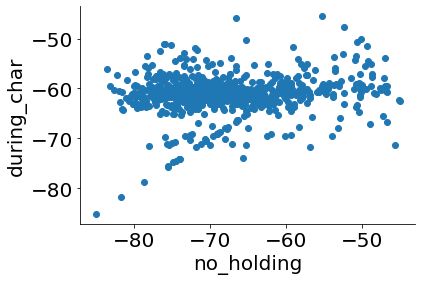

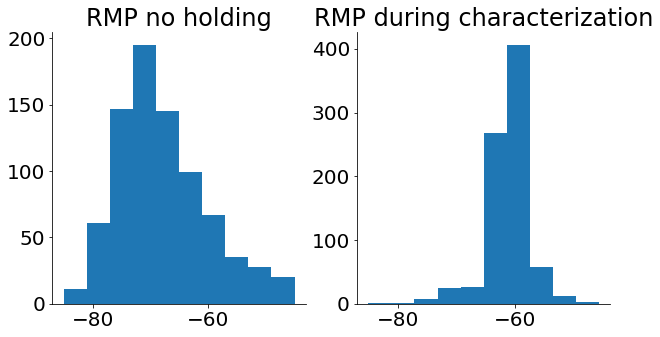

In [13]:
plt.scatter(df_intr_props_clean.resting_potential, df_intr_props_clean.RMP_from_char)
plt.xlabel('no_holding')
plt.ylabel('during_char')
plt.show()

fig,ax  = plt.subplots(1,2, figsize = (10,5))

ax[0].hist(df_intr_props_clean.resting_potential)
ax[0].set_title('RMP no holding')

ax[1].hist(df_intr_props_clean.RMP_from_char)
ax[1].set_title('RMP during characterization')
plt.show()

# plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, 
#          bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, 
#          log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)

In [14]:
# test if different
stat, p = wilcoxon(df_intr_props_clean.resting_potential, df_intr_props_clean.RMP_from_char, alternative = 'two-sided')
#‘two-sided’: the distribution underlying d is not symmetric about zero.
# significant results --> thw two distributions are different

print('The p-value testing the null hypothesis that the two distributions are the same is ', str(round(p,4)))

The p-value testing the null hypothesis that the two distributions are the same is  0.0


## Rheboase

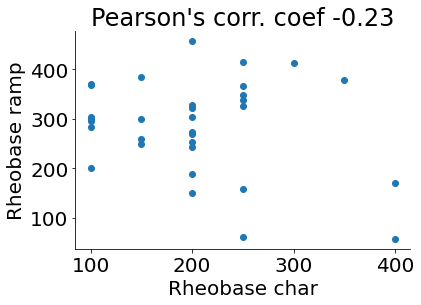

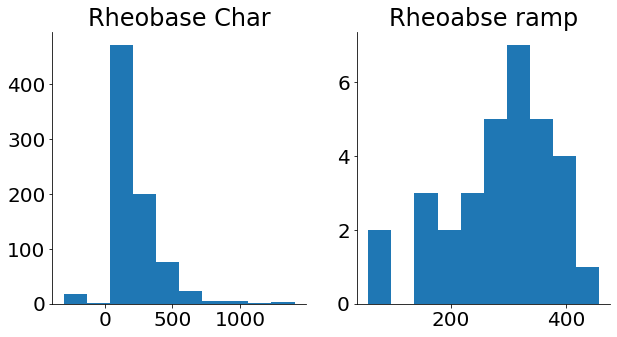

In [15]:
#correlation

corr = np.corrcoef(df_intr_props_clean.patient_age, df_intr_props_clean[param])

plt.scatter(df_intr_props_clean.Rheobase, df_intr_props_clean.rheos_ramp)
plt.xlabel('Rheobase char')
plt.ylabel('Rheobase ramp')
plt.title("Pearson's corr. coef " + str(round(corr[1,0], 2)))
plt.show()

fig,ax  = plt.subplots(1,2, figsize = (10,5))

ax[0].hist(df_intr_props_clean.Rheobase)
ax[0].set_title('Rheobase Char')

ax[1].hist(df_intr_props_clean.rheos_ramp)
ax[1].set_title('Rheoabse ramp')
plt.show()

# plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, 
#          bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, 
#          log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)

In [16]:
# test if different
stat, p = wilcoxon(df_intr_props_clean.Rheobase, df_intr_props_clean.rheos_ramp, alternative = 'two-sided')
#‘two-sided’: the distribution underlying d is not symmetric about zero.
# significant results --> thw two distributions are different

print('The p-value testing the null hypothesis that the two distributions are the same is ', str(round(p,4)))

The p-value testing the null hypothesis that the two distributions are the same is  0.0
